<a href="https://colab.research.google.com/github/masoud-n91/MachineLearning/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("train.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.replace(("female", "male"), (0, 1), inplace=True)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data["Embarked"].replace(("S", "C", "Q"), (0, 1, 2), inplace=True)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,1.0


In [5]:
data.fillna(0, inplace=True)

In [15]:
# temp_df = data.dropna(subset=['Age'])
# age_list = temp_df['Age'].tolist()
# mean_age = np.mean(age_list)
# data.fillna(mean_age, inplace=True)

In [6]:
X = np.array(data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])
Y = np.array(data[["Survived"]])

In [17]:
# X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1)

**Model**

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7, activation="relu"), # input layer
    tf.keras.layers.Dense(16, activation="relu"), # first hidden layer
    tf.keras.layers.Dense(2, activation="softmax") # Output layer
])

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [9]:
output = model.fit(X,Y, epochs=200)

Epoch 1/300
28/28 [==============================] - 1s 2ms/step - loss: 1.6784 - accuracy: 0.6083
Epoch 2/300
28/28 [==============================] - 0s 2ms/step - loss: 1.2301 - accuracy: 0.6083
Epoch 3/300
28/28 [==============================] - 0s 2ms/step - loss: 0.9298 - accuracy: 0.6083
Epoch 4/300
28/28 [==============================] - 0s 2ms/step - loss: 0.7324 - accuracy: 0.6622
Epoch 5/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6297 - accuracy: 0.6689
Epoch 6/300
28/28 [==============================] - 0s 3ms/step - loss: 0.6165 - accuracy: 0.6801
Epoch 7/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.6846
Epoch 8/300
28/28 [==============================] - 0s 3ms/step - loss: 0.6090 - accuracy: 0.6846
Epoch 9/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.6779
Epoch 10/300
28/28 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.6813
Epoch 11/

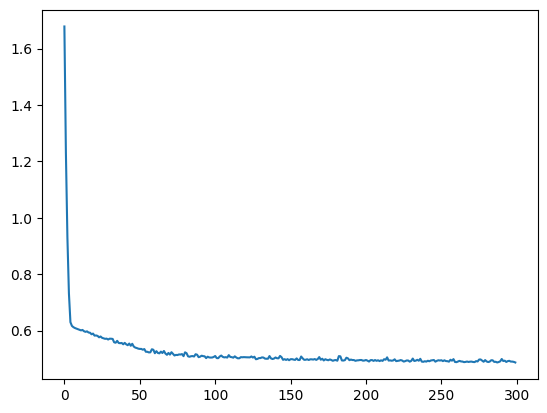

In [10]:
plt.plot(output.history["loss"])
plt.show()

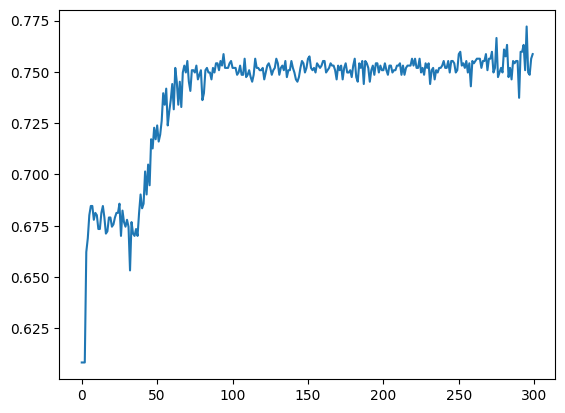

In [11]:
plt.plot(output.history["accuracy"])
plt.show()

In [12]:
df = pd.read_csv("test.csv")
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [13]:
survived = pd.read_csv("gender_submission.csv")
survived.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [14]:
df["Survived"] = survived["Survived"]
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [15]:
df.replace(("female", "male"), (0, 1), inplace=True)
df["Embarked"].replace(("S", "C", "Q"), (0, 1, 2), inplace=True)
df.fillna(0, inplace=True)

In [16]:
X_test = np.array(df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])
Y_test = np.array(df[["Survived"]])

In [17]:
model.evaluate(X_test,Y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8230


[0.37754061818122864, 0.8229665160179138]

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Activation
from keras.models import Sequential, Model
import seaborn as sb

In [19]:
train_data=pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train_data=train_data.replace(['female','male'],[0,1])
train_data=train_data.replace(['S','C','Q'],[0,1,2])
tarin_data=train_data.fillna(0,inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0.0


<ipython-input-21-d55f72f5d45c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),annot=True,cmap=plt.get_cmap('Blues'))


Text(0.5, 1.0, 'Correlation between features and target(Survived)')

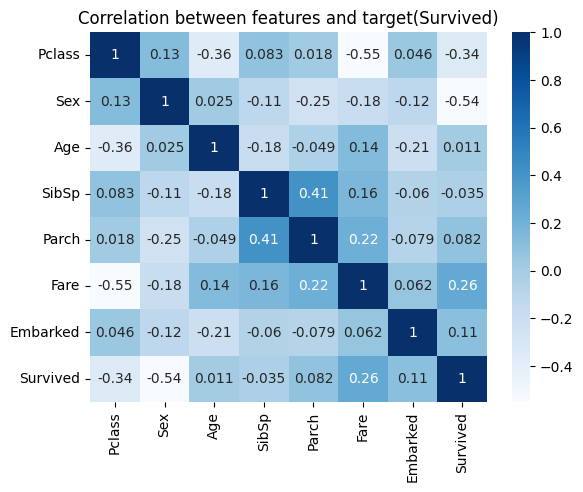

In [21]:
df=pd.DataFrame(data=train_data[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']])
df['Survived']=train_data[['Survived']]
plt.figure()
sb.heatmap(df.corr(),annot=True,cmap=plt.get_cmap('Blues'))
plt.title("Correlation between features and target(Survived)")

In [22]:

Y_train=train_data[['Survived']]
X_train=train_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y_train=np.array(Y_train)
X_train=np.array(X_train)
print(X_train.shape,Y_train.shape)

(891, 7) (891, 1)


In [23]:
test_data = pd.read_csv('test.csv')
test_data = test_data.replace(['female', 'male'], [0, 1])
test_data = test_data.replace(['S', 'C', 'Q'], [0, 1, 2])
test_data = test_data.fillna(0)
X_test = test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
test = pd.read_csv('gender_submission.csv')
Y_test = test[['Survived']]

X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [24]:
print(X_test.shape,Y_test.shape)

(418, 7) (418, 1)


In [25]:
#mlp
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(7,activation='relu'),#input layer with 7 neuron
                                  tf.keras.layers.Dense(16,activation='relu'),
                                  tf.keras.layers.Dense(2,activation='softmax')
])

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [27]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
output=model.fit(X_train,Y_train,epochs=200)

(891, 7) (891, 1)
(418, 7) (418, 1)
Epoch 1/200
28/28 [==============================] - 2s 8ms/step - loss: 0.9683 - accuracy: 0.5870
Epoch 2/200
28/28 [==============================] - 0s 8ms/step - loss: 0.6550 - accuracy: 0.6588
Epoch 3/200
28/28 [==============================] - 0s 8ms/step - loss: 0.6333 - accuracy: 0.6790
Epoch 4/200
28/28 [==============================] - 0s 5ms/step - loss: 0.6265 - accuracy: 0.6712
Epoch 5/200
28/28 [==============================] - 0s 4ms/step - loss: 0.6188 - accuracy: 0.6835
Epoch 6/200
28/28 [==============================] - 0s 4ms/step - loss: 0.6146 - accuracy: 0.6880
Epoch 7/200
28/28 [==============================] - 0s 4ms/step - loss: 0.6127 - accuracy: 0.6857
Epoch 8/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6094 - accuracy: 0.6880
Epoch 9/200
28/28 [==============================] - 0s 4ms/step - loss: 0.6018 - accuracy: 0.6925
Epoch 10/200
28/28 [==============================] - 0s 4ms/step - loss:

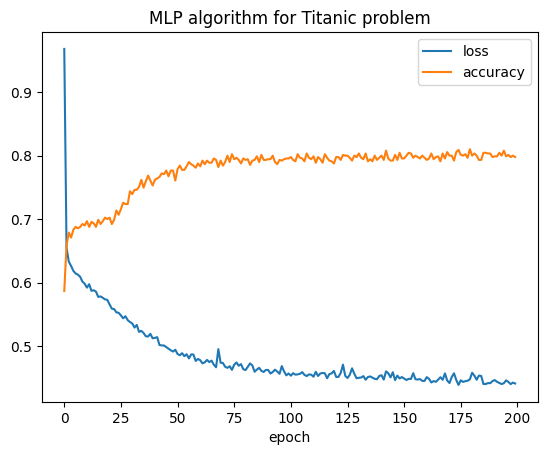

In [28]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('MLP algorithm for Titanic problem')
plt.show()

In [29]:
model.save('titanic.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:

model=tf.keras.models.load_model('titanic.h5')

In [31]:
model.evaluate(X_test,Y_test)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
print(Y_train.reshape(-1).shape)

14/14 [==============================] - 0s 6ms/step - loss: 0.2753 - accuracy: 0.9450
(891, 7) (891, 1)
(418, 7) (418, 1)
(891,)
